<a href="https://colab.research.google.com/github/David-Kumawat/Retail_Sales_Prediction-Regression/blob/main/Regression_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Project Name - Retail Sales Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# ***Let's Begin !***

## ***1. Know Your Data***

#Import Libraries

In [2]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Reading the csv file and converting it to pandas dataframes

rossmann_df = pd.read_csv("/content/drive/MyDrive/Supervised Learning/Regression/Capstone Project/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Supervised Learning/Regression/Capstone Project/store (1).csv")

<ipython-input-3-4d724e550de2>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv("/content/drive/MyDrive/Supervised Learning/Regression/Capstone Project/Rossmann Stores Data.csv")


### Dataset First View

In [4]:
#first look of the Store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
#first look of the rossman_df(sale data)
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

###Dataset Information

In [7]:
# Checking information about the data
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

rossmann_df.duplicated().value_counts(),store_df.duplicated().value_counts()


(False    1017209
 dtype: int64,
 False    1115
 dtype: int64)


###Missing Values/Null Values

In [10]:
# Checking Missing Values/Null Values Count In Rossmann Dataset

rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
# Missing Values/Null Values Count

store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

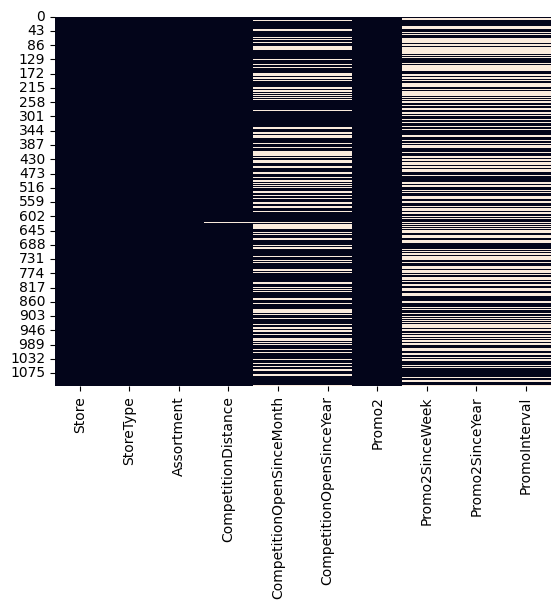

In [12]:
# Visualizing the missing values

sns.heatmap(store_df.isnull(), cbar=False)

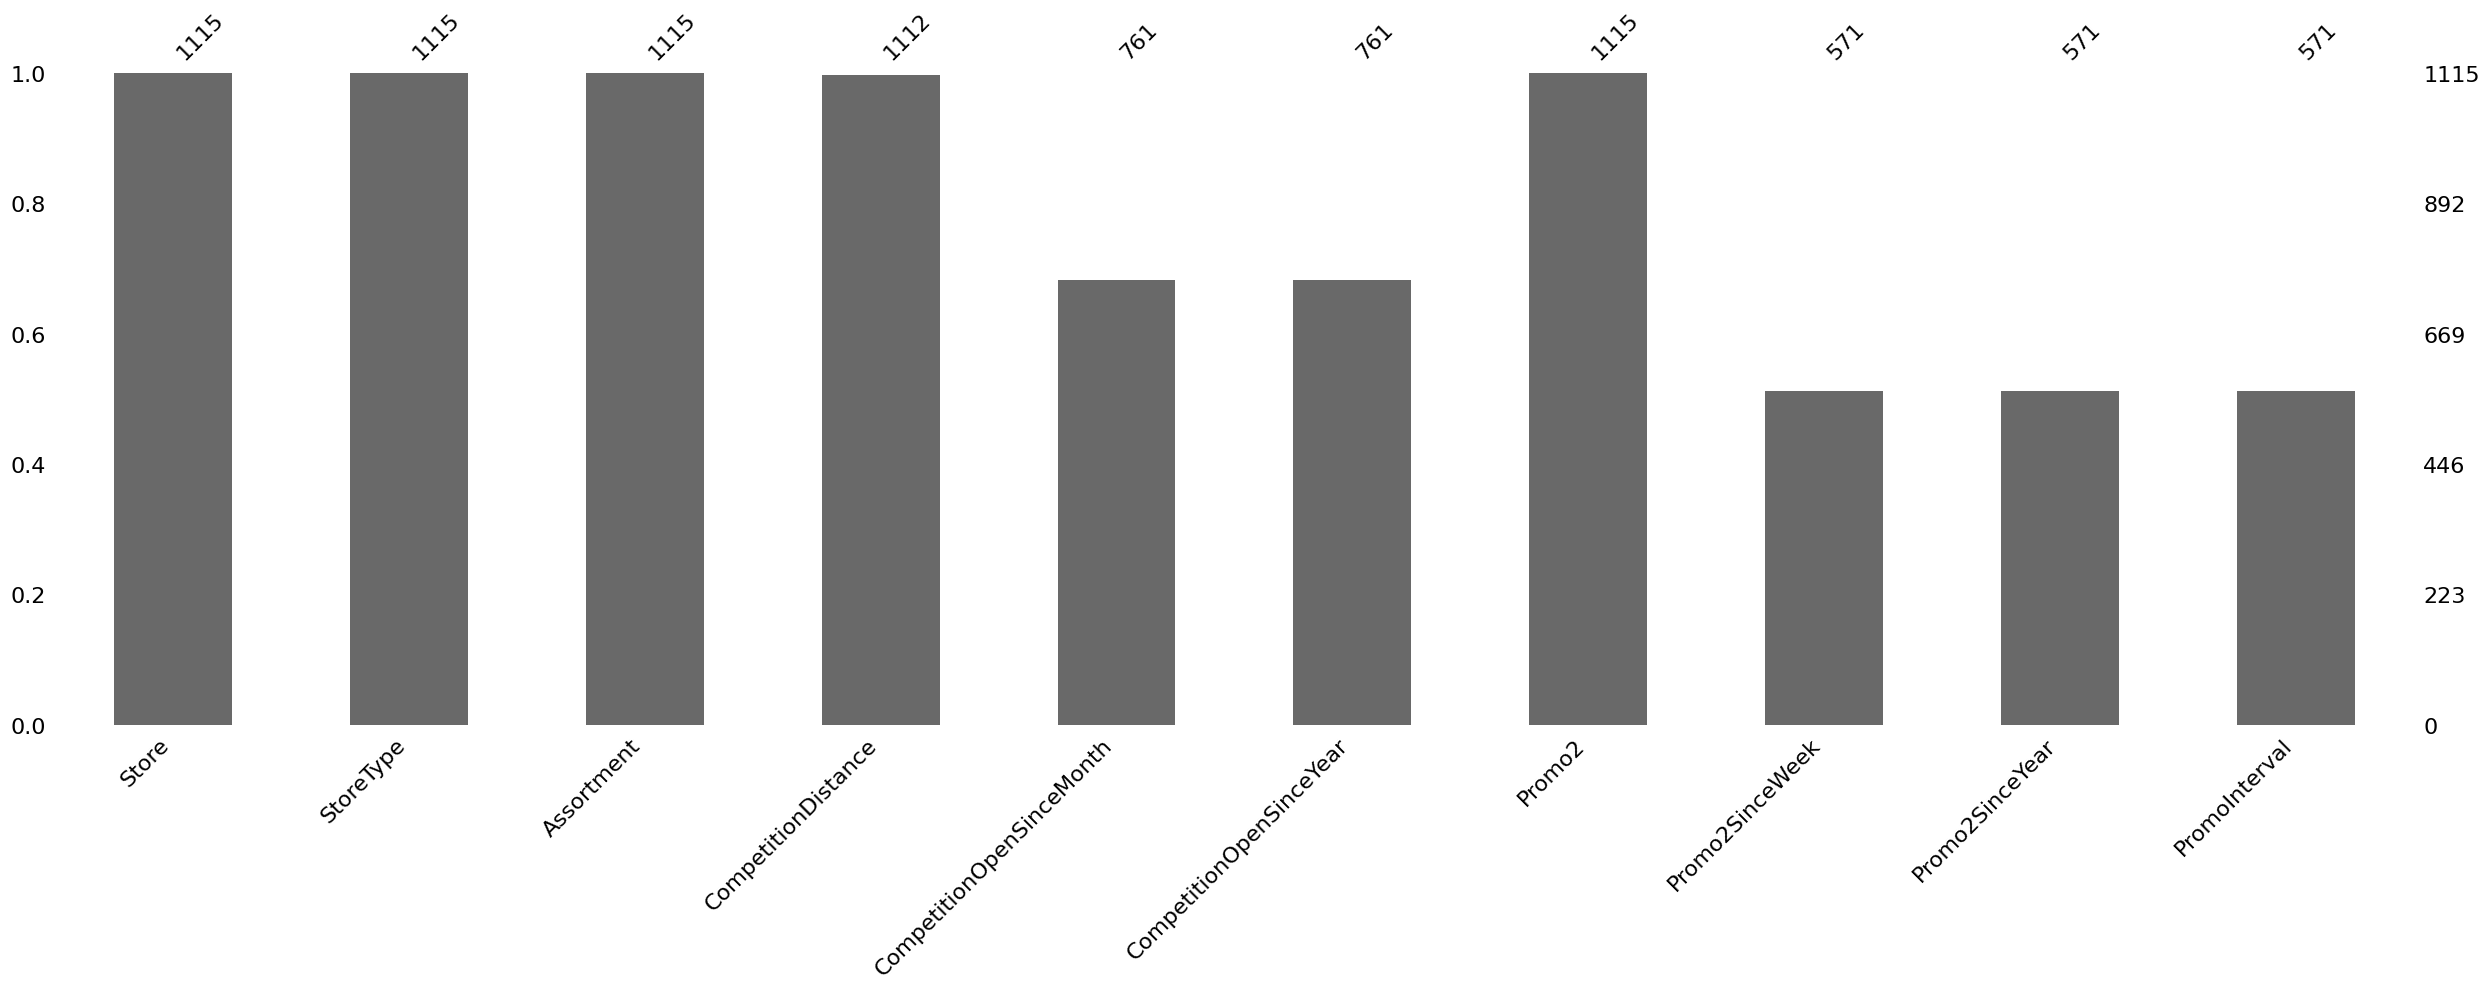

In [13]:
# Visualization bar chart
import missingno as msno
plt.figure(figsize=(4, 5))
msno.bar(store_df)
plt.tight_layout()
plt.show()

###What did you know about your dataset?

**Answer :-**The dataset given is a dataset from Retail store and we have to analysis the daily sales up to six weeks.

I have two dataset.
1. Sales Data
2. Store Data


The above dataset rossmann_df(Sales Data) has 1017209 rows and 9 columns. There are no mising values and duplicate values in the dataset

And in Store_df has 1115 rows and 10 columns. There Are no missing values in this dataset. but null values are there in half of the columns:
1. CompetitionDistance :-3
2. CompetitionOpenSinceMonth :- 354
3. CompetitionOpenSinceYear  :-   354
4. Promo2SinceWeek        :-    544
5. Promo2SinceYear       :-     544
6. PromoInterval         :-    544

## ***2. Understanding Your Variables***

In [14]:
# Rossmann_df Dataset Columns
Columns_rossmann = rossmann_df.columns

# Print the column names
print("Column Names:")
for column in Columns_rossmann:
    print(column)

Column Names:
Store
DayOfWeek
Date
Sales
Customers
Open
Promo
StateHoliday
SchoolHoliday


In [15]:
# Store_df Dataset Columns
Columns_store = store_df.columns

# Print the column names
print("Column Names:")
for column in Columns_store:
    print(column)

Column Names:
Store
StoreType
Assortment
CompetitionDistance
CompetitionOpenSinceMonth
CompetitionOpenSinceYear
Promo2
Promo2SinceWeek
Promo2SinceYear
PromoInterval


In [16]:
# Generate a description of the rossmann_df
data_description = rossmann_df.describe()

# Print the data description
data_description

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
# description of the store_df

store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

Variables Description:-


*   store - a unique Id for each store

---



*   Sales - the turnover for any given day (this is what you are predicting)

---



*  Customers - the number of customers on a given day

---



*   Open - an indicator for whether the store was open: 0 = closed, 1 = open

---



*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

---



*  SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

---



*  StoreType - differentiates between 4 different store models: a, b, c, d

---



* Assortment - describes an assortment level: a = basic, b = extra, c = extended

---



* CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

---



* Promo - indicates whether a store is running a promo on that day

---



* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

---



* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

---



* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

---



###Check Unique Values for each variable.


In [18]:
# Check Unique Values for each variable.
# Get the number of unique values for each column
rossman_df_unique_counts = rossmann_df.nunique()

# Print the unique value counts
print("Unique Value Counts for Each Variable:")
print(rossman_df_unique_counts)

Unique Value Counts for Each Variable:
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [19]:
# Check Unique Values for each variable.
# Get the number of unique values for each column
store_df_unique_counts = store_df.nunique()

# Print the unique value counts
print("Unique Value Counts for Each Variable:")
print(store_df_unique_counts)

Unique Value Counts for Each Variable:
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.
# Null values in store_df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns :-

**1. CompetitionDistance**

**2. CompetitionOpenSinceMonth**

**3. CompetitionOpenSinceYear**

**4. Promo2sinceWeek**

**5. Promo2sinceYear**

**6. PromoInterval**

CompetitionDistance has only 3 null values. we have to clean those data.

###1. CompetitionDistance

In [21]:
# Filling null values
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [22]:
# Replacing Nan values in CompetitionDistance with mode.
# I am filling null values with medium because it is Robust to Outliers.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

2. CompetitionOpenSinceMonth

3. CompetitionOpenSinceYear

4. Promo2sinceWeek

5. Promo2sinceYear

6. PromoInterval

In these columns, I am filling all null values with zeros(0). because most of the rows of these columns are null and I also observe where **promo2** column values are zero(0) there **Promo2sinceWeek,** **Promo2sinceYear,** and **PromoInterval** have null values. because the Promo2 column tells us is a store-run Promotion or not. that's why where promotion values are zero(0) that mean store not run promotion and similer columns relates to promotion null.

In [23]:
# Replacing Nan values with 0.

store = store_df.copy()

# Replacing Nan values with 0 in CompetitionOpenSinceMonth
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Nan values with 0 in CompetitionOpenSinceYear
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceWeek
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceYear
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)

# Replacing Nan values with 0 in PromoInterval
store['PromoInterval'] = store['PromoInterval'].fillna(0)

# Now checking Nan values
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###Merging both datasets the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [24]:
#Merging dataset on store column
df = rossmann_df.merge(right=store, on="Store", how="left")
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [25]:
# Checking shape of the data
df.shape

(1017209, 18)

###Changing different dtypes to Numeric type.

In [26]:
# Checking data type of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [27]:
# Changing StateHoliday dtype from object to numeric.
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

print('levels :', df['StateHoliday'].unique(), '; data type :', df['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [28]:
# Changing Assortment dtype from object to numeric.
df.loc[df['Assortment'] == 'a', 'Assortment'] = 0
df.loc[df['Assortment'] == 'b', 'Assortment'] = 1
df.loc[df['Assortment'] == 'c', 'Assortment'] = 2
df['Assortment'] = df['Assortment'].astype(int, copy=False)

print('levels :', df['Assortment'].unique(), '; data type :', df['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [29]:
# Changing StoreType dtype from object to numeric.
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
df['StoreType'] = df['StoreType'].astype(int, copy=False)

print('levels :', df['StoreType'].unique(), '; data type :', df['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [30]:
# Changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

###What all manipulations have you done and insights you found?

**Answer:-** First I fill null values with zero. and in CompetitionDistance column I fill null values with median. then I merge my both dataset and make it one dataset. then I checked the dataset info and I found in my dataset some columns are string type(object) So I changed string values to numeric values basicaly I did label encoding on my object variables. And In the last I did datetime column which is a object column I changed this column to datetime column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

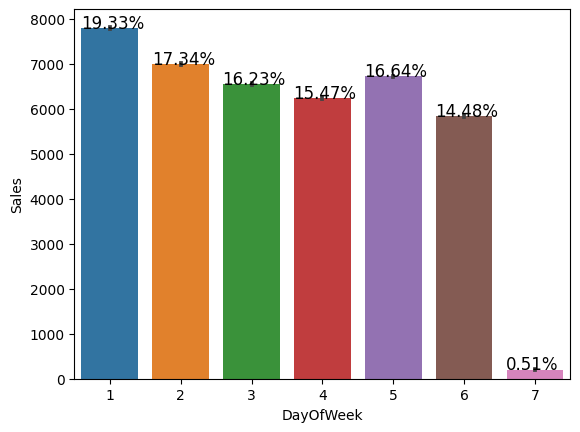

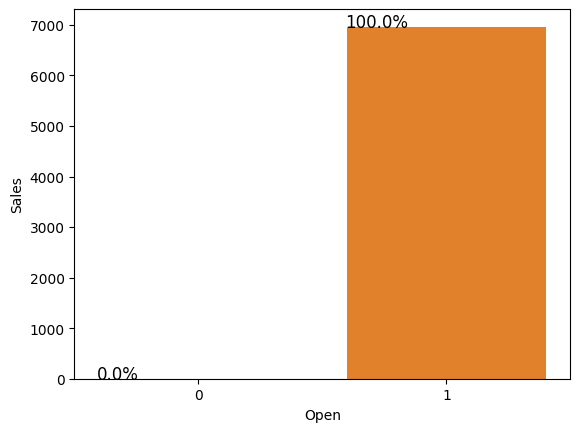

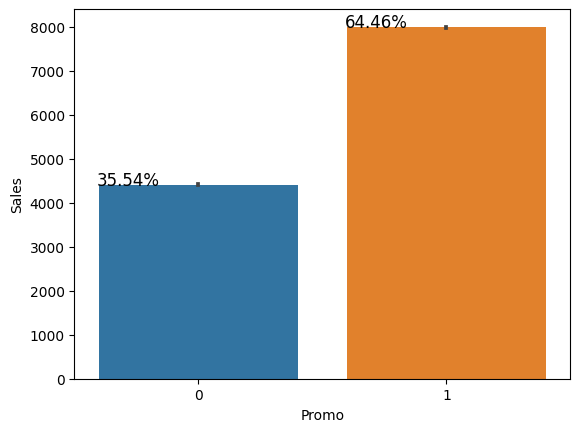

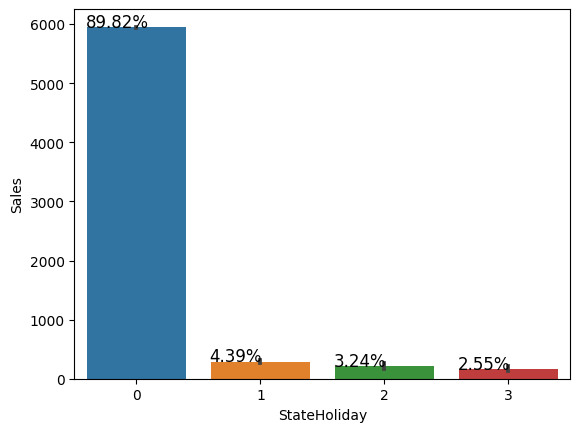

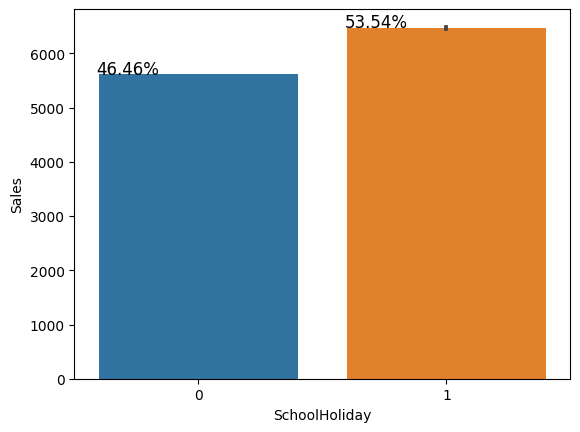

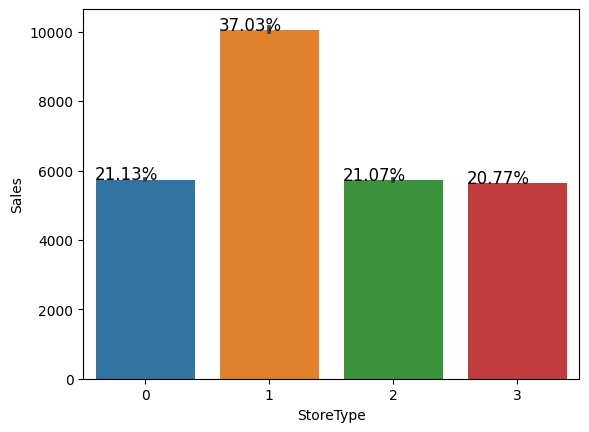

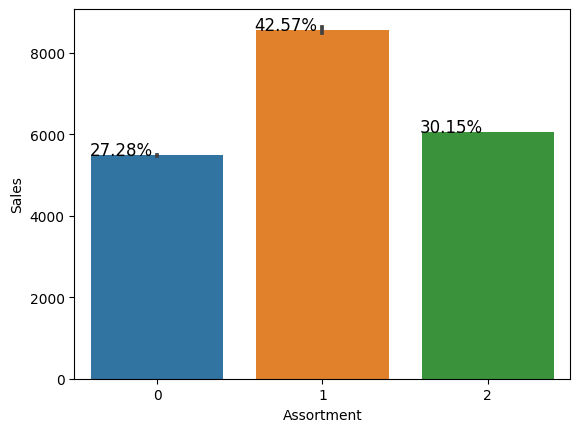

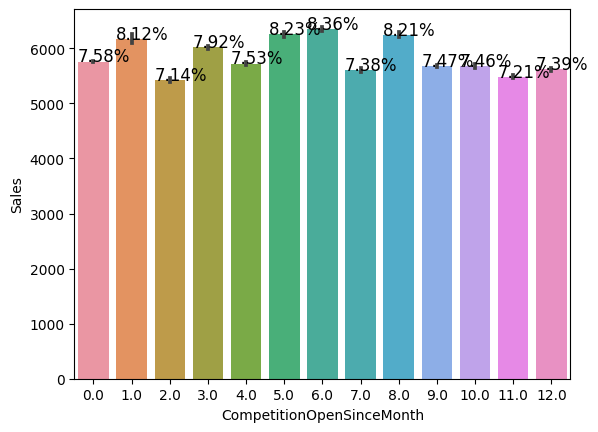

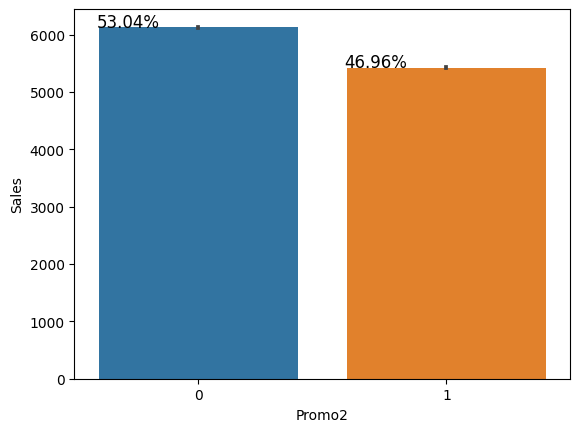

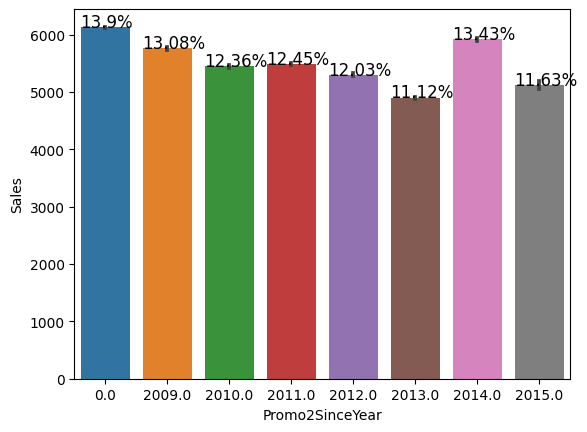

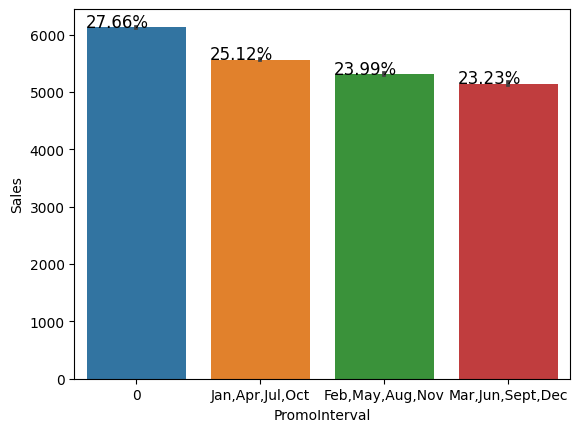

In [32]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

####Chart - 1. Distribution of Sales

<ipython-input-33-024279f773c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Sales'])


<Axes: ylabel='Density'>

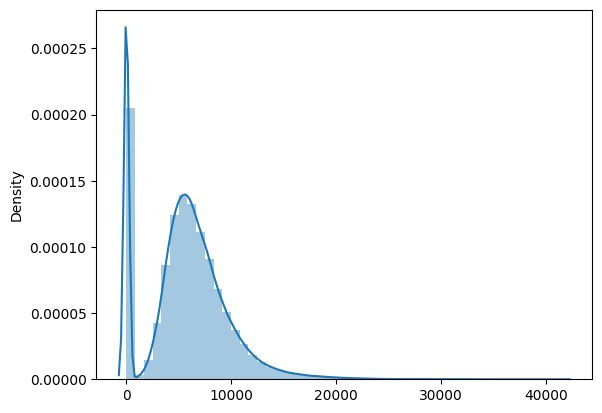

In [33]:
# Chart - 1 visualization code
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

##### 1. Why did you pick the specific chart?

**Answer:-**
A distribution plot (distplot) is used to visualize the frequency distribution of a single variable, providing insights into its central tendency, spread, and shape, making it valuable for data exploration and outlier detection.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. and the data is positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Char - 2. Point Chart on Sales by CompititionOpenSinceYear

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

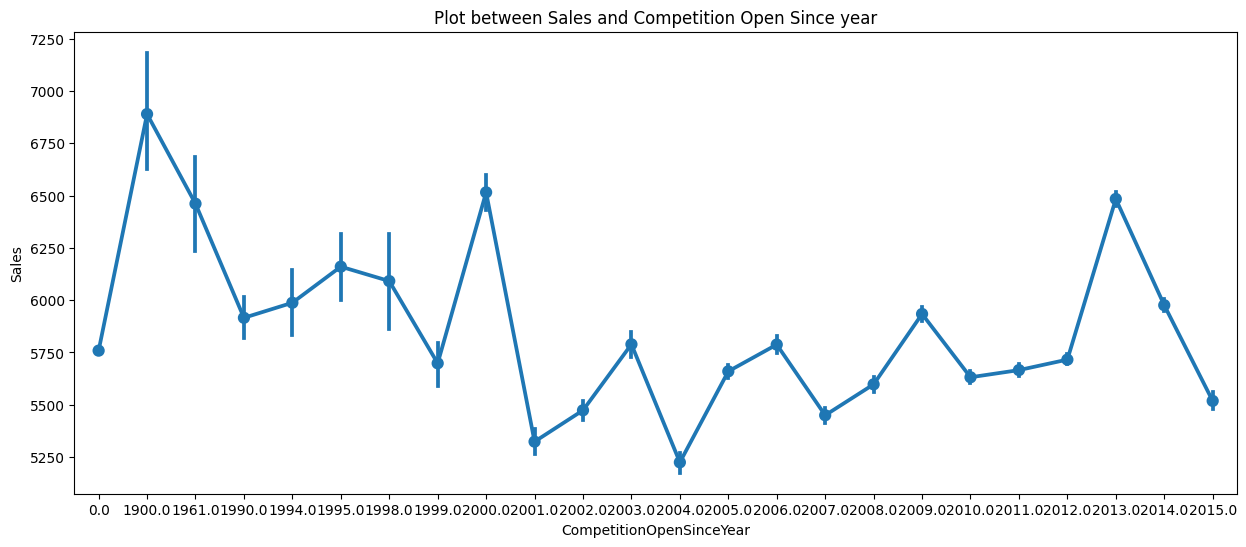

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 6))


sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')

#### 1. Why did you pick the specific chart?

**Answer:-**A point plot is used to visualize the relationship between two variables, displaying data points with respect to their values on both axes, making it effective for comparing data trends or group differences.

####2. What is/are the insight(s) found from the chart?

**Answer:-**From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**As the number of stores increases sales also increase this is a good thing for a business but when the distance between stores is less. then sales of the store go down. because in the less distance, one more store is operating. this will impact negatively on the store. therefore store should be open in a good distance.

####Char - 3. Barplot for Assortment in StoreType

<Axes: xlabel='StoreType', ylabel='Sales'>

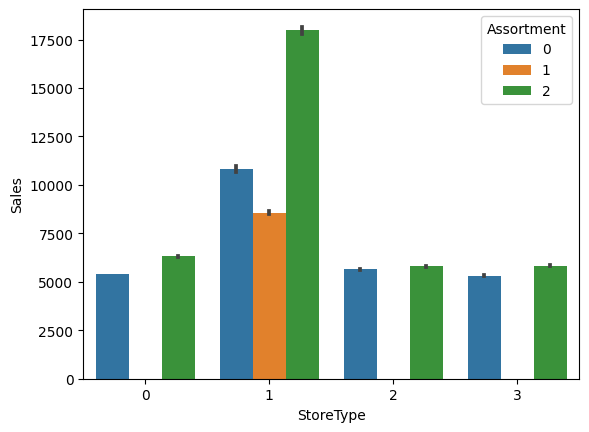

In [35]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

#### 1. Why did you pick the specific chart?

**Answer:-**
A bar chart is used to visually compare and display categorical data by representing each category with a bar. It helps illustrate the distribution, frequency, or relationships between categories in a straightforward and easily interpretable manner.

#### 2. What is/are the insight(s) found from the chart?

**Answer:-**The above bar plot shows that the store types 0, 2 and 3 have only assortment level 0 and 2. On the other hand store type 1 has all the three kinds of assortment strategies, a reason why average sales were high for store type 1 stores.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-** In this bar chart we can see those stores that have all the assortment. those have more sales compared to others. and customers only go to those stores where all the products he/she can get. and store those only some categories they cap, after a time may be customer will decrease in their store.

#### Char - 4. Pie Chart on StoreType

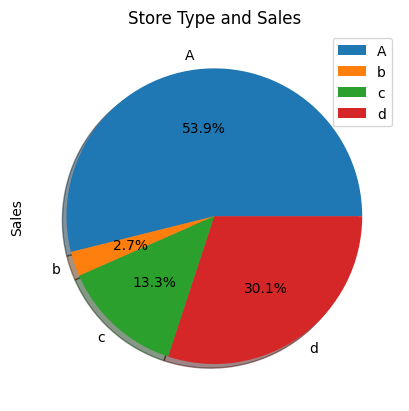

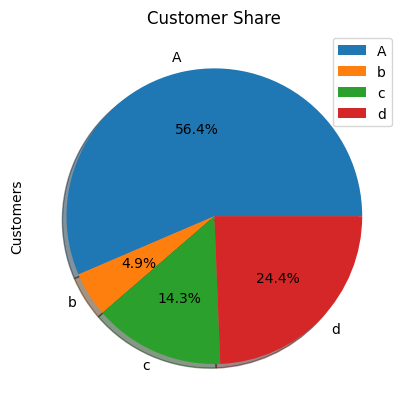

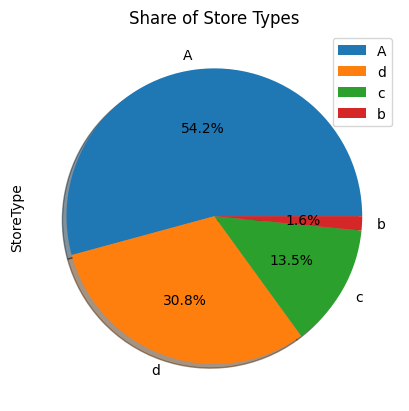

In [36]:
new_df = df.copy()
# Changing StoreType dtype from numeric to object.
new_df.loc[new_df['StoreType'] == 0, 'StoreType'] = 'A'
new_df.loc[new_df['StoreType'] == 1, 'StoreType'] = 'b'
new_df.loc[new_df['StoreType'] == 2, 'StoreType'] = 'c'
new_df.loc[new_df['StoreType'] == 3, 'StoreType'] = 'd'
new_df['StoreType'] = new_df['StoreType'].astype(object, copy=False)



#let's explore store type a bit and it's influence on sales
new_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
new_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
new_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

#### 1. Why did you pick the specific chart?

**Answer:-**
A pie chart is used to represent data as a circle, divided into segments (slices) that visually convey the proportion or distribution of different categories within a whole. It's suitable for displaying categorical data, highlighting individual components' relative sizes, and providing a quick overview of the composition of a dataset. that's why I use pie chart.


#### 2. What is/are the insight(s) found from the chart?

**Answer:-**
The highest sales belonged to store type A(0) due to the high number of type A(0) stores in our dataset. Store type A(0) and D(3) had a similar kind of sales and customer share.

Interesting insight to note is that store type B(1) with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-** We need to fucus on A(0) type of store, becuase most of the sales they have and B(1),C(2) type of store less in amount and also they have fewer sales and market cap. if we increase the number of store B(1),C(2) it will impact business alot. and sales would increase.

#### Chart 5. Sales on Store open or closed

<Axes: xlabel='Open', ylabel='Sales'>

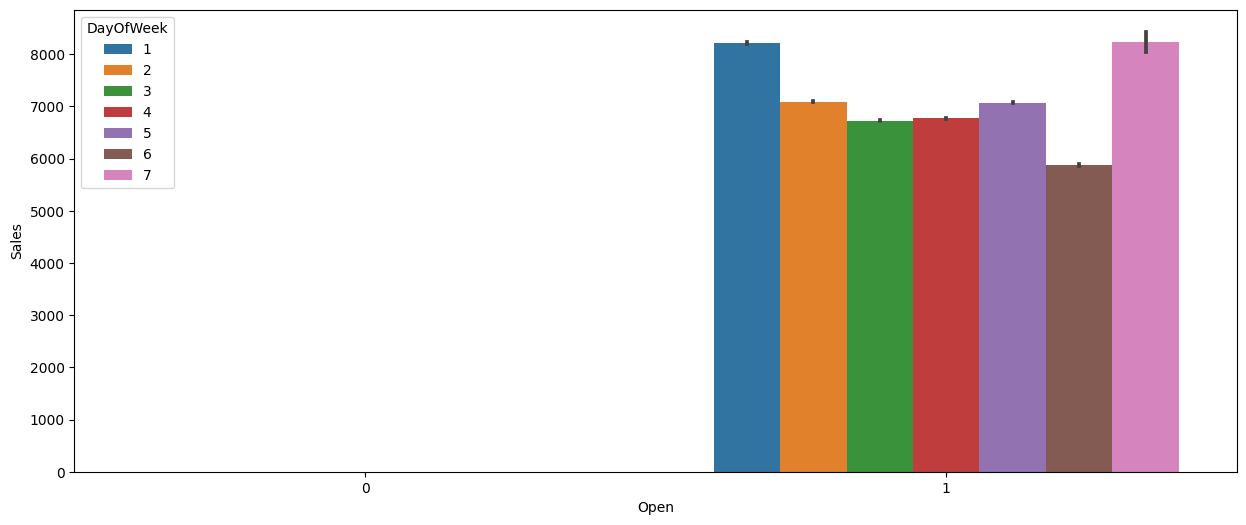

In [37]:
# Set the figure size
plt.figure(figsize=(15, 6))

# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

####1. Why did you pick the specific chart?

**Answer-**
A bar plot is used to visualize and compare categorical data by representing each category with a bar, making it effective for displaying the distribution and relationships between different categories within a dataset. It provides a clear and concise way to convey information about categorical variables.

####2. What is/are the insight(s) found from the chart?

**Answer-** When stores are open sales always come every day and every week. I think the sales column highly correlates with the open variable. because it depends directly on sales when stores are open when sales happen.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** We can see on the chart everyday sales are done therefore we need to open all stores every day on weekends, and holidays also, it will increase our sales, and if we close our store it will end are sales on that day and week.

#### Chart 6. Plot between Sales and Promo2 Since year

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

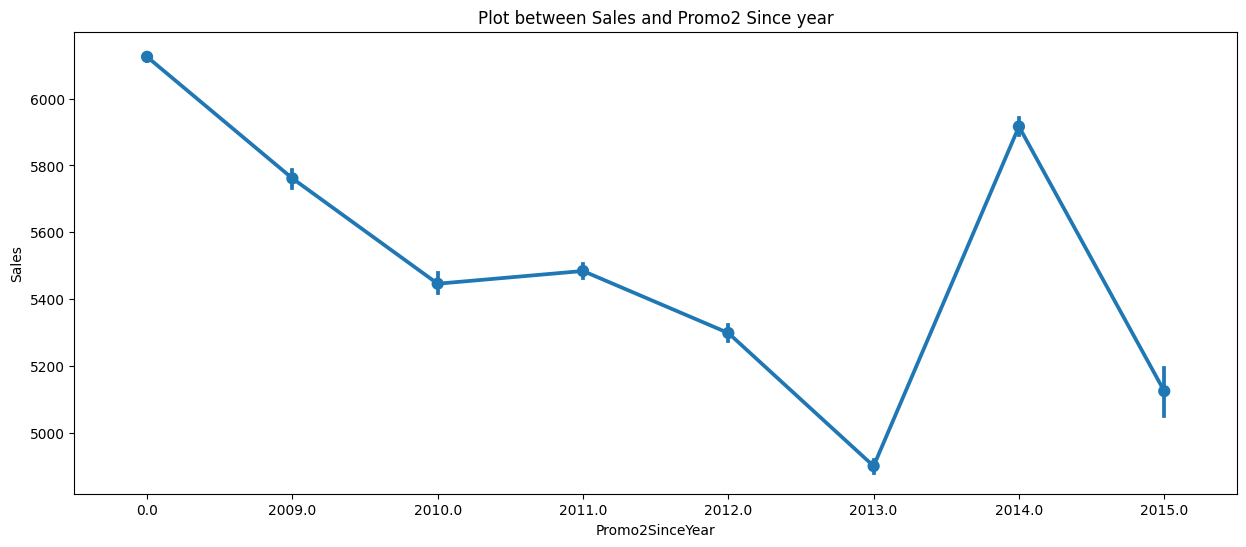

In [38]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Promo2 Since year')

####1. Why did you pick the specific chart?

**Answer-**A point plot is used to display and compare the relationships between two variables, making it useful for showing trends, patterns, or group differences in data. It emphasizes individual data points, highlighting variations and trends effectively.


####2. What is/are the insight(s) found from the chart?

**Answer-**Plot between Sales and promo2sinceyear shows that effect of sales of stores which continue their promotion. this data is available from year 2009 to 2015. Promo2SinceYear has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** Always we need to do promotion it will grow our sales and increase profit. sometimes promotion doesn't do much. but it impacts a lot to increase the business

####Chart 7. Plot between Store and Promo2


Text(0.5, 1.0, 'Plot between Store and Promo2 ')

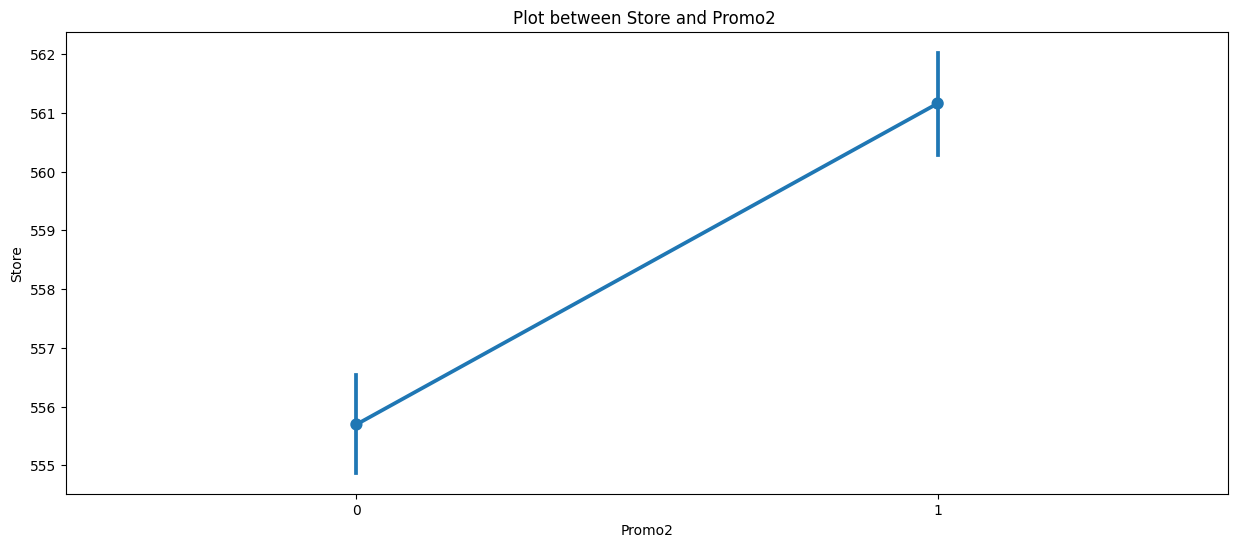

In [39]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2', y= 'Store', data=df)
plt.title('Plot between Store and Promo2 ')

####1. Why did you pick the specific chart?

**Answer-**A point plot is employed to visualize how two variables relate to each other, enabling the identification of trends, patterns, or differences between data groups. It emphasizes specific data points, facilitating the analysis of individual observations and their interactions.



####2. What is/are the insight(s) found from the chart?

**Answer-** We have 1115 stores and from that store, half the doing promotion and half are not. so we need to make them understand for promotion if they do promotion their sales will increase and their profit also.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** We can reach their store and convince them to do a promotion if they do a promotion their sales will increase.

####Chart 8. Plot between Sales and Day of Week


Text(0.5, 1.0, 'Plot between Sales and Day of Week')

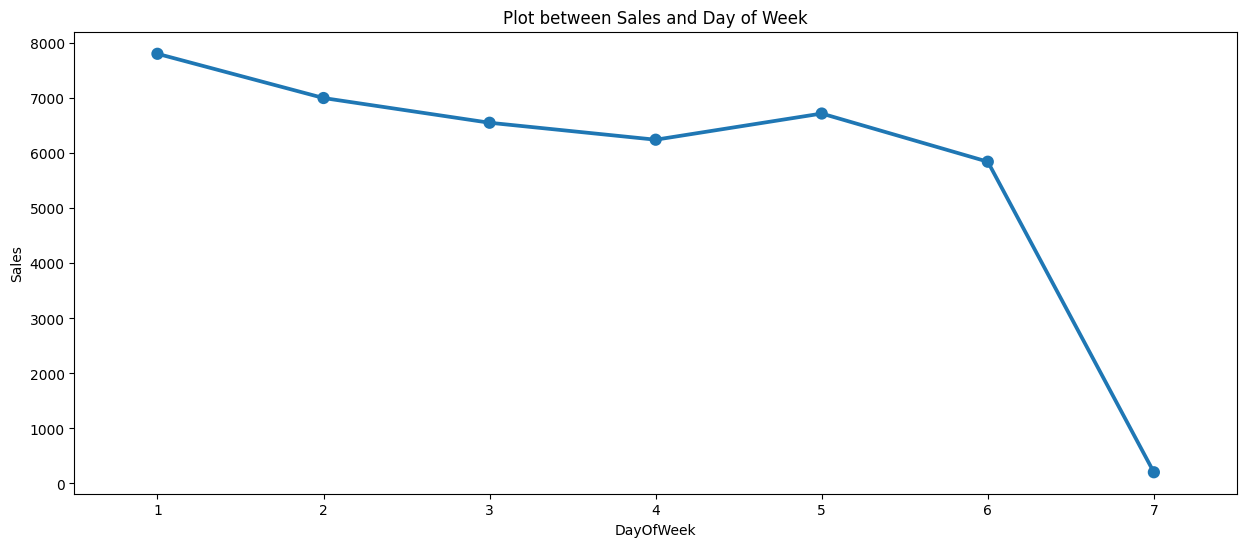

In [41]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=df)
plt.title('Plot between Sales and Day of Week')

####1. Why did you pick the specific chart?

**Answer-**A point plot is employed to visualize how two variables relate to each other, enabling the identification of trends, patterns, or differences between data groups. It emphasizes specific data points, facilitating the analysis of individual observations and their interactions.

####2. What is/are the insight(s) found from the chart?

**Answer-**Plot between Sales and Days of the week shows that maximum sales are on Monday and sales gradually decrease to the 6th day of the week i.e. on Saturday. It also shows that sales on Sunday are almost near to zero as on Sunday maximum stores are closed.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** To increase the sales we need to open a store on Sunday also it will increase are sales a lot because most people are free on the weekend and if we open are store on the weekend it will impact good for sales.

####Chart 9. Plot Customer and Sales


<Axes: xlabel='Customers', ylabel='Sales'>

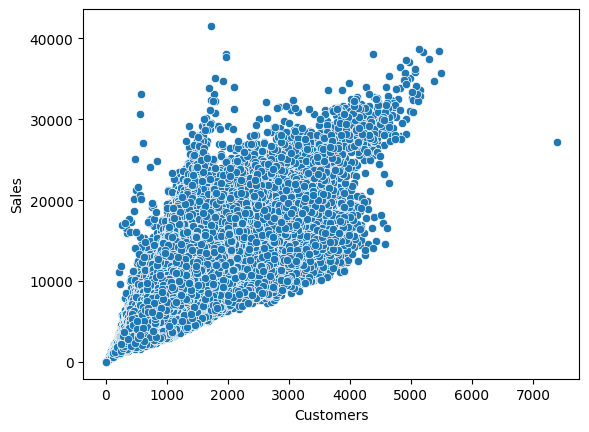

In [42]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

####1. Why did you pick the specific chart?

**Answer-**
A scatter plot is used to visualize the relationship between two continuous variables, allowing us to observe patterns, trends, and potential correlations in the data. It provides a visual representation of how one variable changes concerning another, aiding in data exploration and analysis.

####2. What is/are the insight(s) found from the chart?

**Answer-**We Can see as Customer increase sales also increase positively, Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** It will impact positively the increase in sales because the above trend is as the customer increases sales also increase.

####Chart 10. Plot Between CompetitionDistance and Sales

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

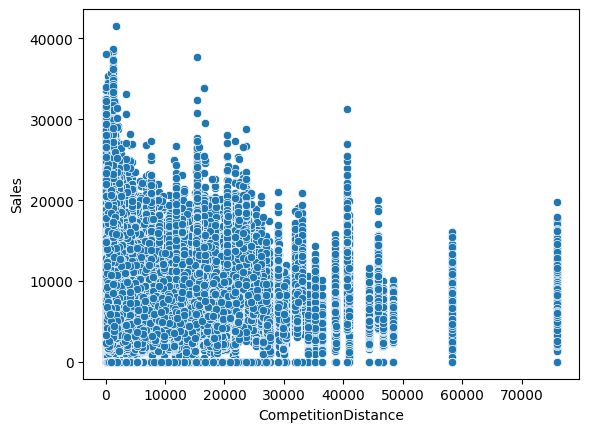

In [46]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

####1. Why did you pick the specific chart?

**Answer-**Scatter plots are used to visualize and analyze the relationship between two continuous variables. They help in identifying patterns, trends within the data, making them a valuable tool in data exploration.

####2. What is/are the insight(s) found from the chart?

**Answer-**From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** It will impact negatively on store that are in less distances.

####Chart 11. Plot Store Daily Open Countplot

Text(0.5, 1.0, 'Store Daily Open Countplot')

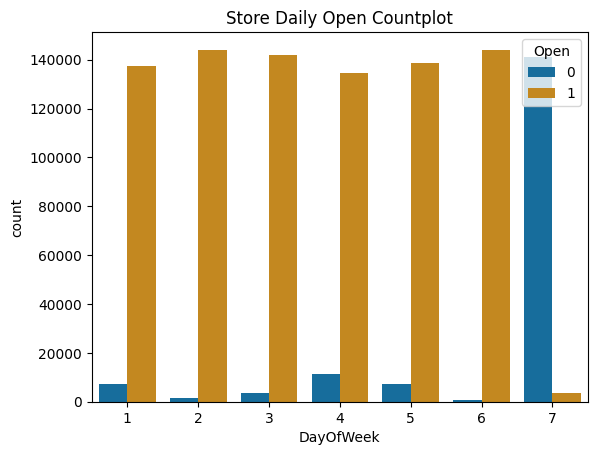

In [49]:
# Countplot for how many stores open on daily basis
sns.countplot(x= 'DayOfWeek', hue='Open', data= df, palette="colorblind")
plt.title('Store Daily Open Countplot')

####1. Why did you pick the specific chart?

**Answer-**Count plots are used to visualize the frequency or count of categorical data within different categories or groups. They are helpful for understanding the distribution and prevalence of categories in a dataset, making them valuable for tasks like data exploration, identifying class imbalances, and assessing the distribution of categorical variables in statistical analysis and machine learning.

####2. What is/are the insight(s) found from the chart?

**Answer-** From the above chart we can see on 7 day of the week which is Sunday, on Sunday most of the store are closed and a few of them is open, and on weekdays all store are open but few of them is closed may be for the refurbishment.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** If we open the store on Sunday also then it will affect our sales in positive. because all the stores are closed on Sunday only a few stores are open, and if the store opens they will sell something and this will impact our sales a lot.

####Chart 12. Plot Store Daily Promo Countplot

Text(0.5, 1.0, 'Store Daily Promo Countplot')

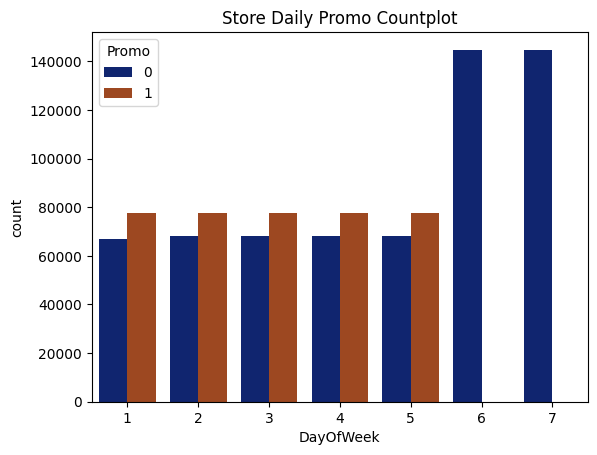

In [51]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= df, palette='dark')
plt.title('Store Daily Promo Countplot')

####1. Why did you pick the specific chart?

**Answer-**Count plots are used to visualize the frequency or count of categorical data within different categories or groups.

####2. What is/are the insight(s) found from the chart?

**Answer-** Promotion is only done on weekdays and some stores not doing any promotion. on Saturdays and Sundays no promotion in any store.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** If we encourage those store persons who are not promoting to do promotion then it will impact the business positively

####Chart 13. Plot between Promo and Sales

<Axes: xlabel='Promo', ylabel='Sales'>

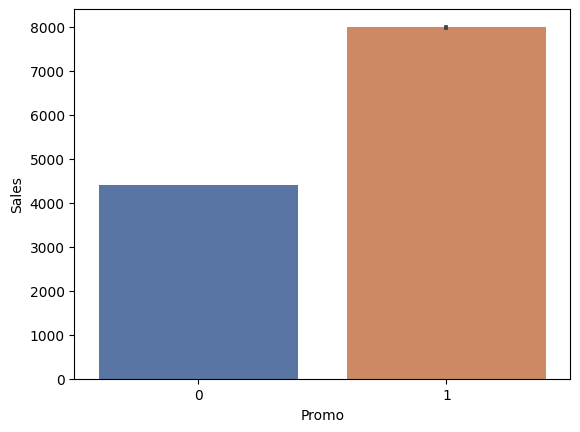

In [52]:
# Creating a barplot for checking sales between who does promotion and not do promotion
sns.barplot(x="Promo", y="Sales", data=df, palette='deep')

####1. Why did you pick the specific chart?

**Answer-**A bar plot is used to visually compare and display categorical data by representing each category with a bar, helping to illustrate the distribution, frequency, or relationships between different categories in a dataset.

####2. What is/are the insight(s) found from the chart?

**Answer-**Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store that didn't opt for promotion and 1 represents stores that for promotion. In the stores that took promotions, their sales are high as compared to stores that didn't take promotions.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** Here we can see that the stores does promotion their sales are also high, we can show this chart to those stores who are not participating in promotion and engage them and when they join our sales increase.

####Chart - 14 - Correlation Heatmap

<ipython-input-53-0bd1e75ca8fe>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


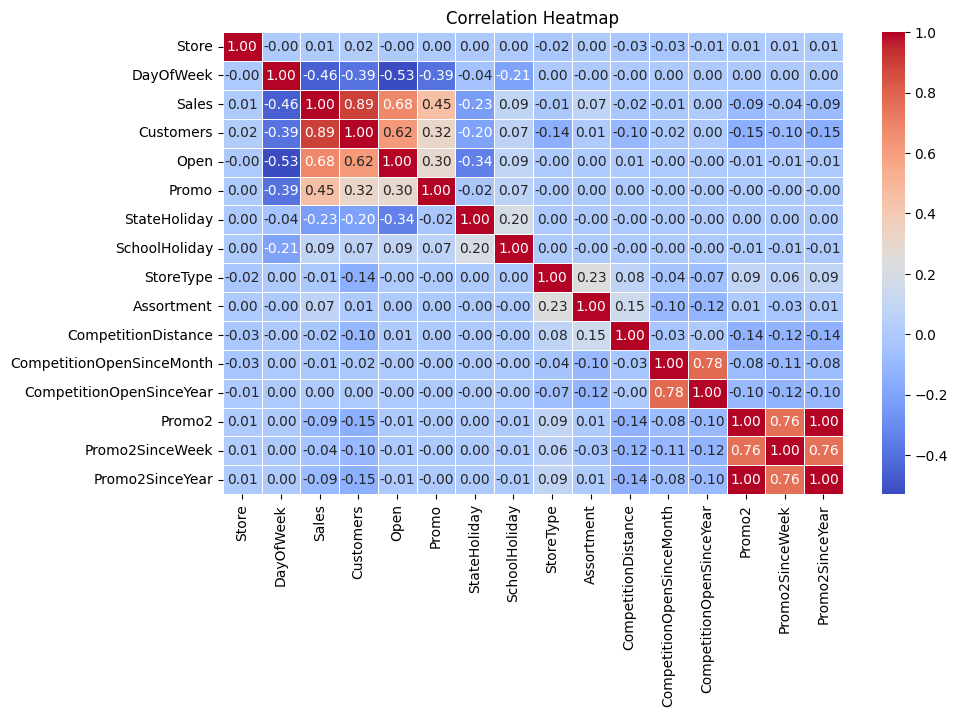

In [53]:
# Correlation Heatmap visualization code

# the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


####1. Why did you pick the specific chart?

**Answer-**A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as input into a more advanced analysis.

Thus to know the correlation between all the variables along with the correlation coefficients, I used a correlation heatmap.

####2. What is/are the insight(s) found from the chart?

**Answer-**From the above correlation heatmap, we can see **Promo2SinceYear & Promo2** is positiveliy highly correlated with a value of 1.

And **Customers & Sales, Open & Sales, Open & Customers, CompetitionOpenSinceYear & CompetitionOpenSinceMonth, Promo2SinceWeek & Promo2, Promo2SinceWeek & Promo2SinceYear** Are Positively correlated to each other.

**Promo & Sales** and **Promo & Customers** and **Promo & Open** are positively correlated only and all are negatively correlated with each other.

Rest all correlation can be depicted from the above chart.

####Chart - 15 - Pair Plot

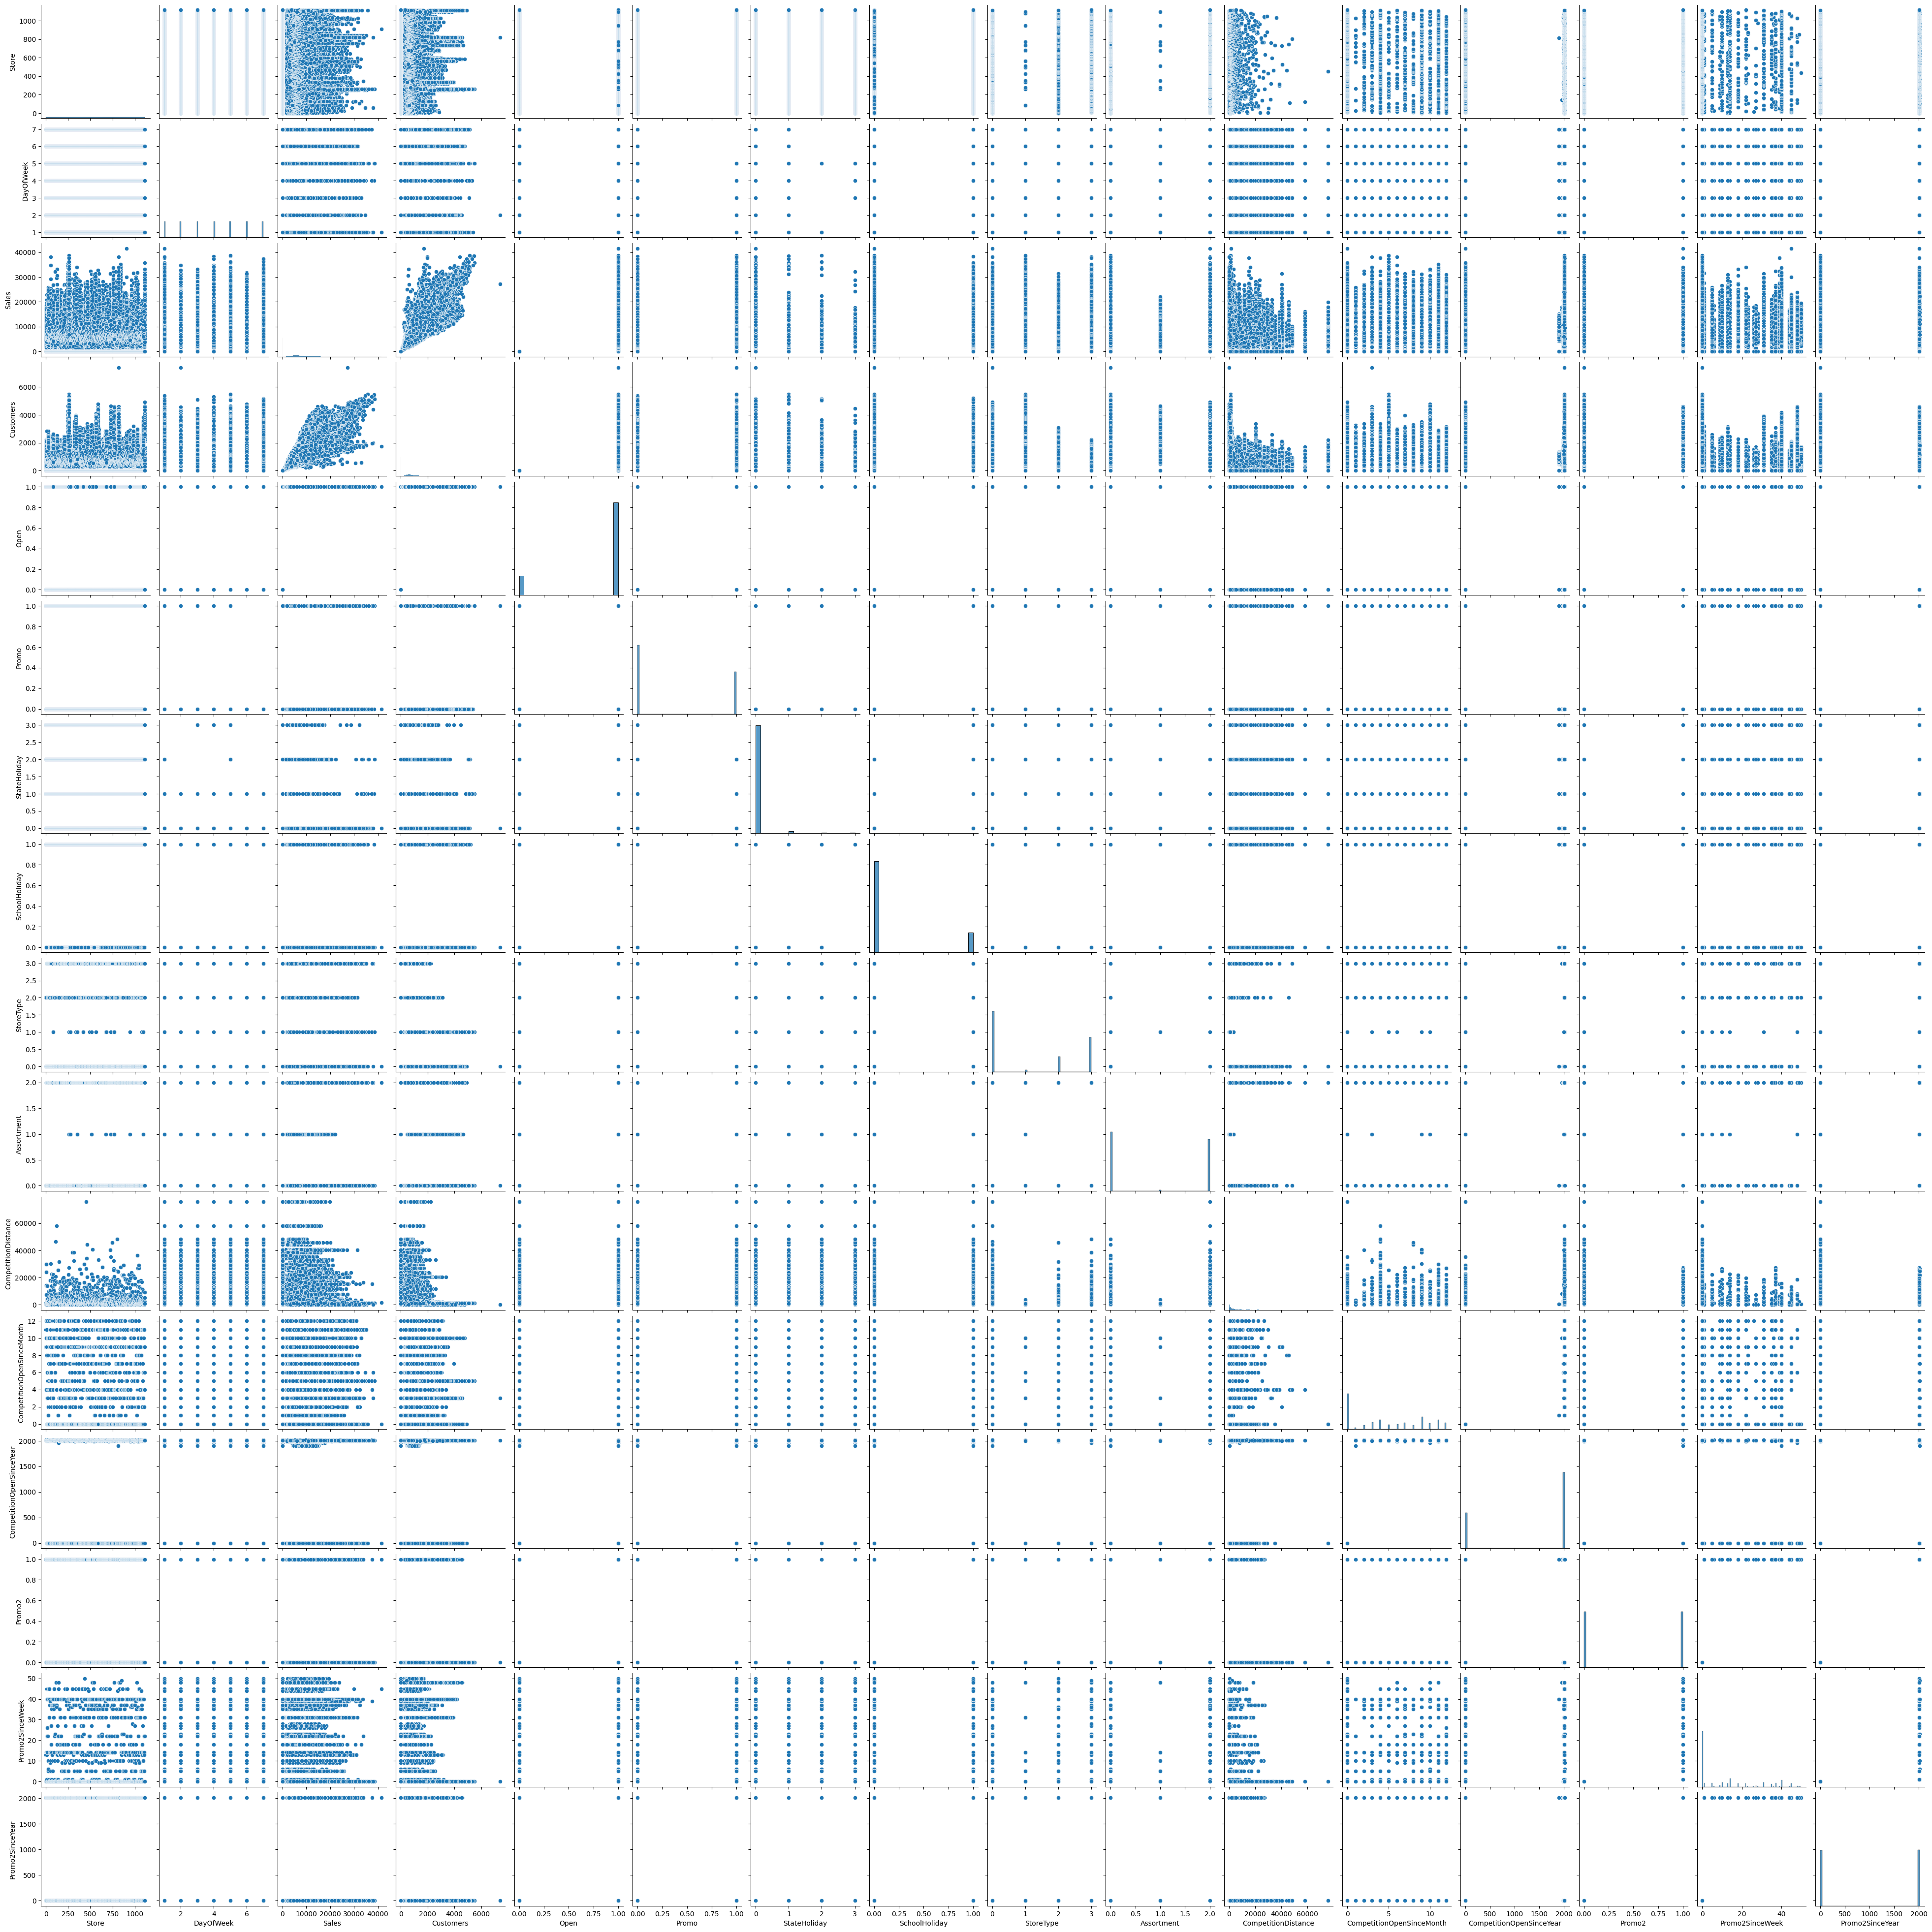

In [54]:
# Pair Plot visualization code
# Creating a pair plot
sns.pairplot(df)

# Show the plot
plt.show()

####1. Why did you pick the specific chart?

**Answer-**
A pair plot, is used to visualize pairwise relationships between numerical variables in a dataset. It provides a grid of scatterplots, making it easy to assess correlations, identify patterns, and explore interactions among multiple variables simultaneously. Pair plots are valuable for data exploration and understanding complex relationships in multivariate data.

####2. What is/are the insight(s) found from the chart?

**Answer-**From the above chart I got to know, there are less linear relationship between variables and data point's aren't linearly separable.

Only Sales and Customers Column are linear.

I can see in this chart there is no normal distribution inseaded of normal distribution there is no distribution i can see all data point are scattered.

Store with Customers and Sales are tightly relate.


his whole pair plot, I can only see there are no linear relations and no pattern in data. Rest insights can be depicted from the above graph.